In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Set working directory, load data. 
## Replace the working directory path or input the full local file path as a parameter in "read_csv"
os.chdir('/Users/elliot/Desktop/Teiko.bio')
cell_count = pd.read_csv('cell-count.csv')
cell_count

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,36000,24000,42000,6000,12000
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,30000,22000,40000,2000,6000
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,35000,26250,37500,10000,16250
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,27900,17100,18000,4500,22500
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,60000,30000,37500,4500,18000
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,27500,24200,33000,5500,19800
6,prj1,sbj4,lung,50,F,tr2,y,s7,PBMC,0.0,31350,19000,23750,8550,12350
7,prj1,sbj4,lung,50,F,tr2,y,s8,tumor,0.0,35000,23000,25000,6000,11000
8,prj1,sbj5,healthy,77,M,none,NaN,s9,PBMC,NaN,45500,27300,32500,6500,18200
9,prj2,sbj6,healthy,45,M,none,NaN,s10,PBMC,NaN,28420,21560,21560,8820,17640


Find frequency for each cell type in each sample. 

In [2]:
#Sum columns and create total count column. 
cell_count['total_count'] = (cell_count['b_cell']+ cell_count['nk_cell'] + cell_count['cd4_t_cell'] + cell_count['cd8_t_cell']) + cell_count['monocyte']
cell_count['total_count']

#Find the relative frequencies of each cell type.
cell_count['b_cell_freq'] = cell_count['b_cell'] / cell_count['total_count']
cell_count['nk_cell_freq'] = cell_count['nk_cell'] / cell_count['total_count']
cell_count['cd4_t_cell_freq'] = cell_count['cd4_t_cell'] / cell_count['total_count']
cell_count['cd8_t_cell_freq'] = cell_count['cd8_t_cell'] / cell_count['total_count']
cell_count['monocyte_freq'] = cell_count['monocyte'] / cell_count['total_count']

Output csv file

In [3]:
cell_count.columns

Index(['project', 'subject', 'condition', 'age', 'sex', 'treatment',
       'response', 'sample', 'sample_type', 'time_from_treatment_start',
       'b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte',
       'total_count', 'b_cell_freq', 'nk_cell_freq', 'cd4_t_cell_freq',
       'cd8_t_cell_freq', 'monocyte_freq'],
      dtype='object')

In [4]:
#Remove unnecessary columns and save to csv.
df = cell_count.drop(columns=['project', 'subject', 'condition', 'age', 
                                      'sex', 'treatment', 'response', 'sample_type', 
                                      'time_from_treatment_start'])
df.to_csv('cell_count_freq.csv')
df

,sample,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_freq,nk_cell_freq,cd4_t_cell_freq,cd8_t_cell_freq,monocyte_freq
0,s1,36000,24000,42000,6000,12000,120000,0.30,0.05,0.35,0.20,0.10
1,s2,30000,22000,40000,2000,6000,100000,0.30,0.02,0.40,0.22,0.06
2,s3,35000,26250,37500,10000,16250,125000,0.28,0.08,0.30,0.21,0.13
3,s4,27900,17100,18000,4500,22500,90000,0.31,0.05,0.20,0.19,0.25
4,s5,60000,30000,37500,4500,18000,150000,0.40,0.03,0.25,0.20,0.12
5,s6,27500,24200,33000,5500,19800,110000,0.25,0.05,0.30,0.22,0.18
6,s7,31350,19000,23750,8550,12350,95000,0.33,0.09,0.25,0.20,0.13
7,s8,35000,23000,25000,6000,11000,100000,0.35,0.06,0.25,0.23,0.11
8,s9,45500,27300,32500,6500,18200,130000,0.35,0.05,0.25,0.21,0.14
9,s10,28420,21560,21560,8820,17640,98000,0.29,0.09,0.22,0.22,0.18


2.

In [5]:
#Filter the df for treated samples only.
treated = cell_count[cell_count['treatment'] == 'tr1']
treated = treated[treated['sample_type'] == 'PBMC']
treated

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,...,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_freq,nk_cell_freq,cd4_t_cell_freq,cd8_t_cell_freq,monocyte_freq
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,...,24000,42000,6000,12000,120000,0.30,0.05,0.35,0.20,0.10
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,...,22000,40000,2000,6000,100000,0.30,0.02,0.40,0.22,0.06
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,...,26250,37500,10000,16250,125000,0.28,0.08,0.30,0.21,0.13
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,...,30000,37500,4500,18000,150000,0.40,0.03,0.25,0.20,0.12
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,...,24200,33000,5500,19800,110000,0.25,0.05,0.30,0.22,0.18
11,prj2,sbj8,melanoma,30,F,tr1,y,s12,PBMC,0.0,...,22800,45600,6000,6000,120000,0.33,0.05,0.38,0.19,0.05
12,prj2,sbj9,melanoma,72,M,tr1,y,s13,PBMC,0.0,...,24150,47150,8050,4600,115000,0.27,0.07,0.41,0.21,0.04
13,prj2,sbj10,lung,63,M,tr1,n,s14,PBMC,0.0,...,20000,25000,3000,21000,100000,0.31,0.03,0.25,0.20,0.21
14,prj2,sbj11,lung,55,F,tr1,n,s15,PBMC,0.0,...,15200,20800,3200,12000,80000,0.36,0.04,0.26,0.19,0.15
15,prj3,sbj12,melanoma,50,F,tr1,n,s16,PBMC,0.0,...,20000,24000,4000,38000,100000,0.14,0.04,0.24,0.20,0.38


/var/folders/k9/6q8s3bc96_52psvkzj9vdhg40000gn/T/ipykernel_37628/3720526793.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True)


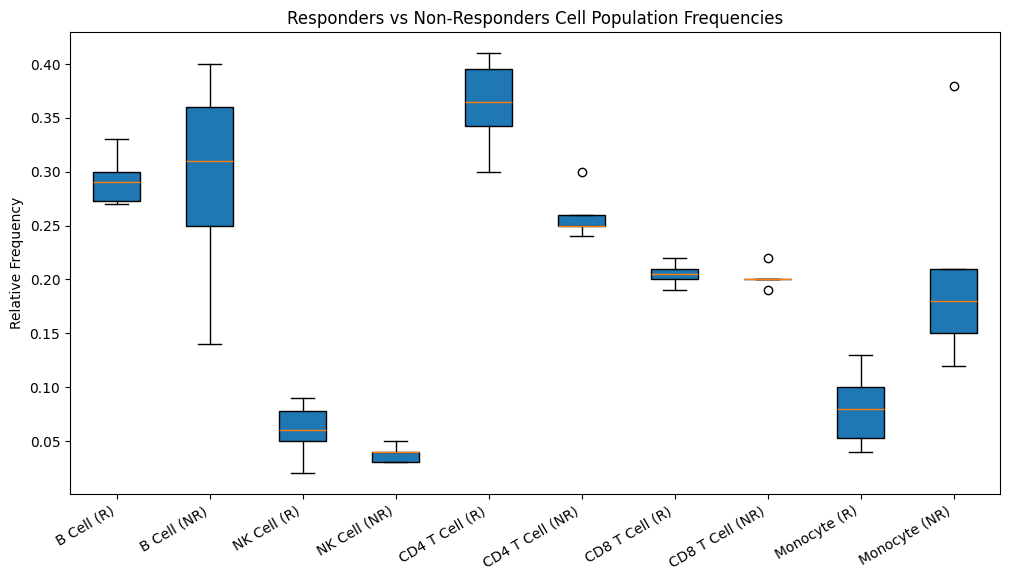

<Figure size 640x480 with 0 Axes>

In [6]:
#Split the data into those who responded and those who did not. 

responders = treated[treated['response'] == 'y']
non_responders = treated[treated['response'] == 'n']

data = [
    responders['b_cell_freq'], 
    non_responders['b_cell_freq'], 
    responders['nk_cell_freq'], 
    non_responders['nk_cell_freq'], 
    responders['cd4_t_cell_freq'], 
    non_responders['cd4_t_cell_freq'], 
    responders['cd8_t_cell_freq'], 
    non_responders['cd8_t_cell_freq'], 
    responders['monocyte_freq'], 
    non_responders['monocyte_freq']
]

labels = [
    'B Cell (R)', 'B Cell (NR)', 
    'NK Cell (R)', 'NK Cell (NR)', 
    'CD4 T Cell (R)', 'CD4 T Cell (NR)', 
    'CD8 T Cell (R)', 'CD8 T Cell (NR)', 
    'Monocyte (R)', 'Monocyte (NR)'
]
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=labels, patch_artist=True)
plt.xticks(rotation=30, ha='right')
plt.ylabel('Relative Frequency')
plt.title('Responders vs Non-Responders Cell Population Frequencies')
plt.show()

plt.savefig('cell_population_boxplot.png')

In [7]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each cell population
results = {}
cell_types = ['b_cell_freq', 'nk_cell_freq', 'cd4_t_cell_freq', 'cd8_t_cell_freq', 'monocyte_freq']

for cell_type in cell_types:
    stat, p_value = mannwhitneyu(responders[cell_type], non_responders[cell_type], alternative='two-sided')
    results[cell_type] = {'statistic': stat, 'p_value': p_value}

# Display results
for cell_type, result in results.items():
    print(f"{cell_type}: U-statistic = {result['statistic']}, p-value = {result['p_value']}")


b_cell_freq: U-statistic = 13.0, p-value = 0.7832281528031937
nk_cell_freq: U-statistic = 24.0, p-value = 0.11560643738731947
cd4_t_cell_freq: U-statistic = 29.5, p-value = 0.010236485254670896
cd8_t_cell_freq: U-statistic = 18.0, p-value = 0.6295610210332581
monocyte_freq: U-statistic = 1.0, p-value = 0.013497246674934243


In [8]:
#Monocyte and cd4_t_cell frequencies are significantly different between responders and non-responders to the 95th percentile. 